<a href="https://colab.research.google.com/github/gaurav-pal19/Case-Study-s/blob/master/Non_Linear_model_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import statsmodels.formula.api as smf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
A=pd.read_csv('/content/drive/My Drive/Colab Notebooks/GL/car_sales.csv',index_col=0)
A.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


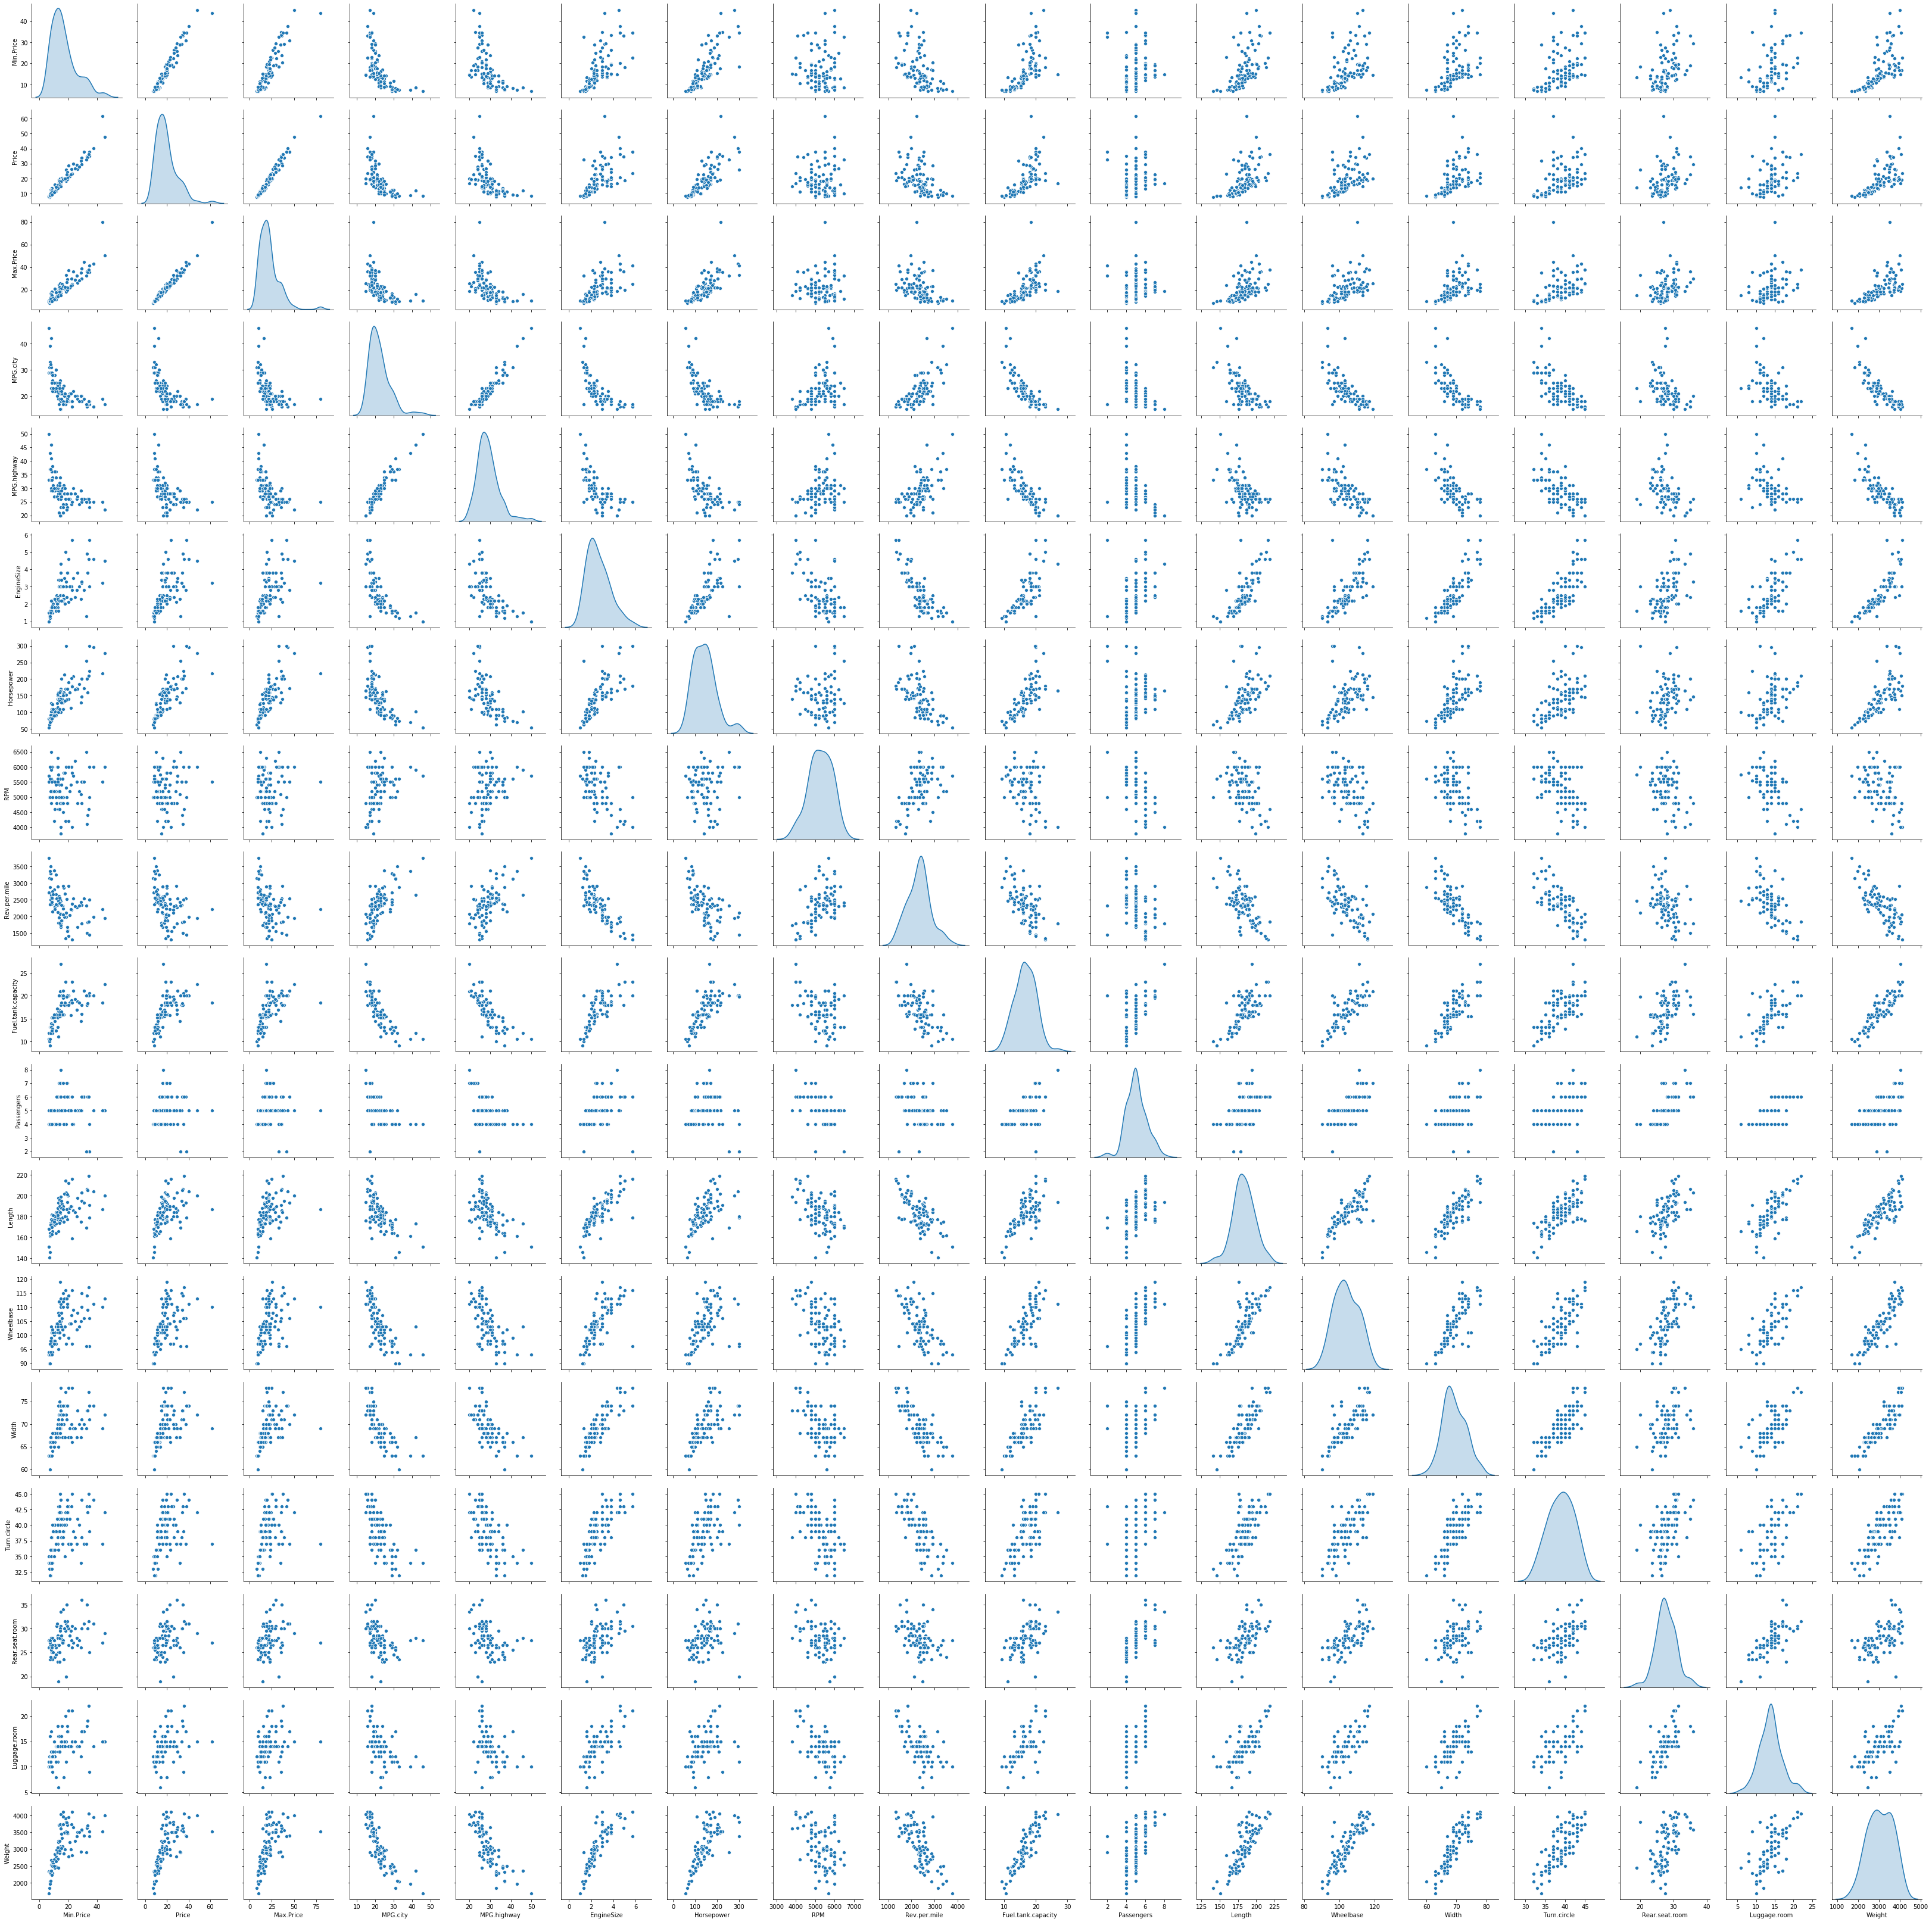

In [5]:
sns.pairplot(A,diag_kind='kde')

In [6]:
A.corr()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
Min.Price,1.000000,0.970601,0.906756,-0.622875,-0.579966,0.645488,0.802444,-0.042598,-0.470395,0.635369,0.061236,0.553859,0.516758,0.492878,0.428603,0.376642,0.413485,0.666554
Price,0.970601,1.000000,0.981580,-0.594562,-0.560680,0.597425,0.788218,-0.004955,-0.426395,0.619480,0.057860,0.503628,0.500864,0.456028,0.392590,0.311499,0.366569,0.647179
Max.Price,0.906756,0.981580,1.000000,-0.547811,-0.522561,0.535012,0.744445,0.025015,-0.374024,0.581294,0.053216,0.442933,0.467501,0.408414,0.347785,0.247260,0.315315,0.605142
MPG.city,-0.622875,-0.594562,-0.547811,1.000000,0.943936,-0.710003,-0.672636,0.363045,0.695857,-0.813144,-0.416856,-0.666239,-0.667108,-0.720534,-0.666389,-0.384347,-0.494894,-0.843139
MPG.highway,-0.579966,-0.560680,-0.522561,0.943936,1.000000,-0.626795,-0.619044,0.313469,0.587497,-0.786039,-0.466386,-0.542897,-0.615384,-0.640359,-0.593683,-0.366684,-0.371629,-0.810658
EngineSize,0.645488,0.597425,0.535012,-0.710003,-0.626795,1.000000,0.732120,-0.547898,-0.824009,0.759306,0.372721,0.780283,0.732484,0.867110,0.778464,0.502750,0.680827,0.845075
Horsepower,0.802444,0.788218,0.744445,-0.672636,-0.619044,0.732120,1.000000,0.036688,-0.600314,0.711790,0.009264,0.550865,0.486854,0.644413,0.561216,0.256732,0.359217,0.738798
RPM,-0.042598,-0.004955,0.025015,0.363045,0.313469,-0.547898,0.036688,1.000000,0.494764,-0.333345,-0.467138,-0.441249,-0.467812,-0.539721,-0.505651,-0.342175,-0.524845,-0.427931
Rev.per.mile,-0.470395,-0.426395,-0.374024,0.695857,0.587497,-0.824009,-0.600314,0.494764,1.000000,-0.609710,-0.334976,-0.690233,-0.636824,-0.780460,-0.733160,-0.377010,-0.592792,-0.735264
Fuel.tank.capacity,0.635369,0.619480,0.581294,-0.813144,-0.786039,0.759306,0.711790,-0.333345,-0.609710,1.000000,0.472095,0.690461,0.757674,0.798719,0.671343,0.509689,0.613437,0.894018


In [7]:
A.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

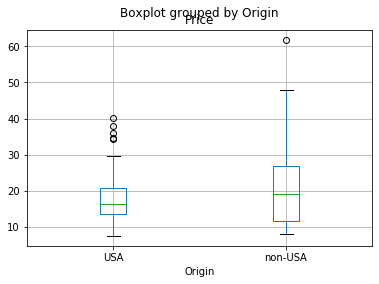

In [8]:
A.boxplot(column='Price',by='Origin')

In [9]:
A['Man.trans.avail'].value_counts()

Yes    61
No     32
Name: Man.trans.avail, dtype: int64

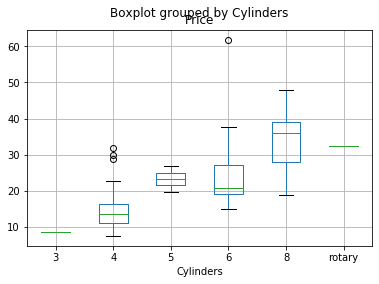

In [10]:
A.boxplot(column='Price',by='Cylinders')

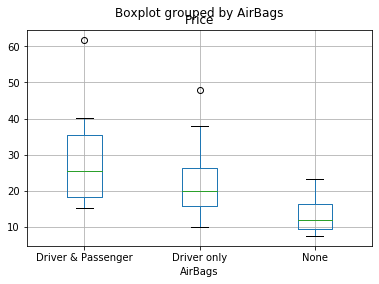

In [11]:
A.boxplot(column='Price',by='AirBags')

In [12]:
A1=A[A['AirBags']=='Driver & Passenger']
A1['Price'].describe()

count    16.000000
mean     28.368750
std      12.545422
min      15.100000
25%      18.225000
50%      25.550000
75%      35.425000
max      61.900000
Name: Price, dtype: float64

In [0]:
X=A[['MPG.city','MPG.highway','DriveTrain','Cylinders','Man.trans.avail',
     'Horsepower','Rev.per.mile','Fuel.tank.capacity','Length','Width','Weight','AirBags']]
Y=A[['Price']]

In [14]:
X['Man.trans.avail'].replace({'Yes':1,'No':0},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [15]:
X['Man.trans.avail'].value_counts()

1    61
0    32
Name: Man.trans.avail, dtype: int64

In [0]:
#X['Rear.seat.room'].fillna(X['Rear.seat.room'].median(),inplace=True)
#X['Luggage.room'].fillna(X['Luggage.room'].median(),inplace=True)

In [17]:
X.corr()

,MPG.city,MPG.highway,Man.trans.avail,Horsepower,Rev.per.mile,Fuel.tank.capacity,Length,Width,Weight
MPG.city,1.000000,0.943936,0.444210,-0.672636,0.695857,-0.813144,-0.666239,-0.720534,-0.843139
MPG.highway,0.943936,1.000000,0.404419,-0.619044,0.587497,-0.786039,-0.542897,-0.640359,-0.810658
Man.trans.avail,0.444210,0.404419,1.000000,-0.353033,0.599297,-0.483223,-0.645906,-0.626017,-0.612110
Horsepower,-0.672636,-0.619044,-0.353033,1.000000,-0.600314,0.711790,0.550865,0.644413,0.738798
Rev.per.mile,0.695857,0.587497,0.599297,-0.600314,1.000000,-0.609710,-0.690233,-0.780460,-0.735264
Fuel.tank.capacity,-0.813144,-0.786039,-0.483223,0.711790,-0.609710,1.000000,0.690461,0.798719,0.894018
Length,-0.666239,-0.542897,-0.645906,0.550865,-0.690233,0.690461,1.000000,0.822148,0.806274
Width,-0.720534,-0.640359,-0.626017,0.644413,-0.780460,0.798719,0.822148,1.000000,0.874961
Weight,-0.843139,-0.810658,-0.612110,0.738798,-0.735264,0.894018,0.806274,0.874961,1.000000


In [0]:
#X['Luggage.room'].describe()

In [0]:
X_airbags=pd.get_dummies(X['AirBags'])
X_update=pd.concat([X,X_airbags],axis=1)
#Dummies for Drive Train
X_DT=pd.get_dummies(X['DriveTrain'])
X_update=pd.concat([X_update,X_DT],axis=1)
#Dummies for Cylinders
X_cyl=pd.get_dummies(X['Cylinders'])
X_update=pd.concat([X_update,X_cyl],axis=1)


In [20]:
X_update.columns

Index(['MPG.city', 'MPG.highway', 'DriveTrain', 'Cylinders', 'Man.trans.avail',
       'Horsepower', 'Rev.per.mile', 'Fuel.tank.capacity', 'Length', 'Width',
       'Weight', 'AirBags', 'Driver & Passenger', 'Driver only', 'None', '4WD',
       'Front', 'Rear', '3', '4', '5', '6', '8', 'rotary'],
      dtype='object')

In [21]:
X_final=X_update.drop(['AirBags','DriveTrain','Cylinders'],axis=1)
X_final.shape

(93, 21)

In [0]:
LR=LinearRegression()

In [23]:
X_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 21 columns):
MPG.city              93 non-null int64
MPG.highway           93 non-null int64
Man.trans.avail       93 non-null int64
Horsepower            93 non-null int64
Rev.per.mile          93 non-null int64
Fuel.tank.capacity    93 non-null float64
Length                93 non-null int64
Width                 93 non-null int64
Weight                93 non-null int64
Driver & Passenger    93 non-null uint8
Driver only           93 non-null uint8
None                  93 non-null uint8
4WD                   93 non-null uint8
Front                 93 non-null uint8
Rear                  93 non-null uint8
3                     93 non-null uint8
4                     93 non-null uint8
5                     93 non-null uint8
6                     93 non-null uint8
8                     93 non-null uint8
rotary                93 non-null uint8
dtypes: float64(1), int64(8), uint8(12)
memory usage: 1

In [0]:
models = []
models.append(('MVLR', LR))

MVLR: 5.218789 (0.823221)


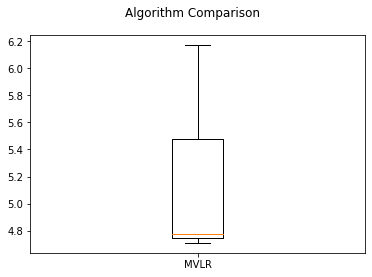

In [25]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = model_selection.cross_val_score(model, X_final, Y,cv=kfold, scoring='neg_mean_squared_error')
	results.append(np.sqrt(np.abs(cv_results)))
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [26]:
results

[array([4.77787726, 4.70993648, 6.1685528 ])]

In [0]:
from sklearn.preprocessing import PolynomialFeatures

In [0]:
XNL=X_final[['MPG.city','MPG.highway']]

In [0]:
#Quadratic Regression Model
qr=PolynomialFeatures(degree=2)
x_qr=qr.fit_transform(XNL)


In [30]:
type(x_qr)

numpy.ndarray

In [31]:
x_qr_df=pd.DataFrame(x_qr)
x_qr_df.head()

,0,1,2,3,4,5
0,1.0,25.0,31.0,625.0,775.0,961.0
1,1.0,18.0,25.0,324.0,450.0,625.0
2,1.0,20.0,26.0,400.0,520.0,676.0
3,1.0,19.0,26.0,361.0,494.0,676.0
4,1.0,22.0,30.0,484.0,660.0,900.0


In [0]:
x_qr_df=x_qr_df.drop([0,1,2],axis=1)


In [0]:
idx=np.arange(x_qr_df.shape[0])

In [0]:
X_final.index=idx

In [35]:
X_final_NL=pd.concat([x_qr_df,X_final],axis=1)
X_final_NL.head()

,3,4,5,MPG.city,MPG.highway,Man.trans.avail,Horsepower,Rev.per.mile,Fuel.tank.capacity,Length,Width,Weight,Driver & Passenger,Driver only,None,4WD,Front,Rear,3,4,5,6,8,rotary
0,625.0,775.0,961.0,25,31,1,140,2890,13.2,177,68,2705,0,0,1,0,1,0,0,1,0,0,0,0
1,324.0,450.0,625.0,18,25,1,200,2335,18.0,195,71,3560,1,0,0,0,1,0,0,0,0,1,0,0
2,400.0,520.0,676.0,20,26,1,172,2280,16.9,180,67,3375,0,1,0,0,1,0,0,0,0,1,0,0
3,361.0,494.0,676.0,19,26,1,172,2535,21.1,193,70,3405,1,0,0,0,1,0,0,0,0,1,0,0
4,484.0,660.0,900.0,22,30,1,208,2545,21.1,186,69,3640,0,1,0,0,0,1,0,1,0,0,0,0


MVLR: 5.417600 (0.945460)


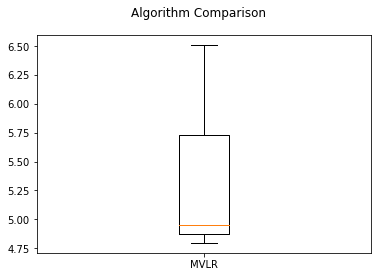

In [36]:
# Validating the 3rd order Polynomial Regression Model
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = model_selection.cross_val_score(model, X_final_NL, Y,cv=kfold, scoring='neg_mean_squared_error')
	results.append(np.sqrt(np.abs(cv_results)))
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [37]:
A.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

In [0]:
X_new=A[['MPG.city','MPG.highway','DriveTrain','Cylinders','Man.trans.avail','EngineSize',
     'Horsepower','Rev.per.mile','Fuel.tank.capacity','Length','Width','Turn.circle',
     'Rear.seat.room','Luggage.room','Weight','AirBags']]
Y=A[['Price']]

In [39]:
X_new['Rear.seat.room'].fillna(X_new['Rear.seat.room'].median(),inplace=True)
X_new['Luggage.room'].fillna(X_new['Luggage.room'].median(),inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [40]:
X_new['Man.trans.avail'].replace({'Yes':1,'No':0},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [41]:
X_new['Man.trans.avail'].value_counts()

1    61
0    32
Name: Man.trans.avail, dtype: int64

In [0]:
X_airbags=pd.get_dummies(X_new['AirBags'])
X_update=pd.concat([X_new,X_airbags],axis=1)
#Dummies for Drive Train
X_DT=pd.get_dummies(X_new['DriveTrain'])
X_update=pd.concat([X_update,X_DT],axis=1)
#Dummies for Cylinders
X_cyl=pd.get_dummies(X_new['Cylinders'])
X_update=pd.concat([X_update,X_cyl],axis=1)


In [43]:
X_pca=X_update.drop(['AirBags','DriveTrain','Cylinders'],axis=1)
X_pca.shape

(93, 25)

In [0]:
sc=StandardScaler()
X_std=sc.fit_transform(X_pca)

In [0]:
cov_matrix = np.cov(X_std.T)

In [0]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [47]:
eig_vals

array([ 1.05639825e+01,  2.21623553e+00,  1.97742222e+00,  1.64815576e+00,
        1.46788965e+00,  1.34235055e+00,  1.13872609e+00,  1.03506372e+00,
        7.65259652e-01,  7.14761055e-01,  4.38176083e-01,  3.84028601e-01,
        3.49706736e-01,  3.19301571e-01,  2.46137236e-01,  1.76709440e-01,
        1.65648374e-01,  1.31646708e-01,  7.35021107e-02,  5.75413972e-02,
        2.52531681e-02,  3.42409581e-02, -1.00582954e-15,  1.81664614e-16,
        7.20749257e-17])

In [0]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [0]:
eigen_pairs_sorted=sorted(eigen_pairs,reverse=True)

In [50]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 41.80156524  50.57118541  58.39582389  64.9175585   70.72598205
  76.03764873  80.54357563  84.63931164  87.66743586  90.49573766
  92.22959572  93.74919276  95.13297856  96.39645144  97.37041383
  98.06965119  98.72512002  99.24604463  99.53689169  99.76458238
  99.90007349 100.         100.         100.         100.        ]


In [0]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eigen_pairs_sorted[index][0] for index in range(len(eig_vals))]
eigvectors_sort = [eigen_pairs_sorted[index][1] for index in range(len(eig_vals))]

In [0]:
P_reduce = np.array(eigvectors_sort[0:18]).transpose()

In [53]:
# Let's project data onto 2D space
Proj_data = np.dot(X_std,P_reduce)
Proj_data.shape

(93, 18)

In [54]:
type(Proj_data)

numpy.ndarray

In [0]:
from sklearn import metrics

In [56]:
from sklearn.model_selection import KFold
from sklearn import metrics
kf=KFold(n_splits=3,shuffle=True,random_state=0)
for model, name in zip([LR],['LinearRegression']):
    rmse=[]
    for train,test in kf.split(Proj_data,Y):
        Xtrain,Xtest=Proj_data[train,:],Proj_data[test,:]
        Ytrain,Ytest=Y.iloc[train],Y.iloc[test]
        model.fit(Xtrain,Ytrain)
        Y_predict=model.predict(Xtest)
        mse=metrics.mean_squared_error(Ytest,Y_predict)
        rmse.append(np.sqrt(mse))
    print("RMSE scores: %0.02f (+/- %0.5f) [%s]" % (np.mean(rmse),
                                    np.std(rmse,ddof=1), name ))   

RMSE scores: 5.59 (+/- 0.66965) [LinearRegression]


In [57]:
(0.8232-0.6695)/0.8232

0.18671039844509238

In [58]:
(5.59-5.218)/5.59

0.06654740608228979

In [59]:
LR.fit(Proj_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
Proj_data[:3,:]

array([[-2.81652748,  0.4970531 , -0.17612774,  0.11797536, -0.53746396,
        -0.49336638, -0.93157584, -0.60474956, -0.50371156,  0.33618957,
         0.06093331,  0.37863056, -0.15931071, -0.47448517,  0.10257462,
         0.0247102 , -0.3513485 , -0.4009162 ],
       [ 2.05058911,  1.48754754, -0.88897247, -0.40395142, -1.72220391,
         1.30726231,  0.21374133,  0.51143238,  0.33785688,  0.79294483,
         1.45114265, -0.4496693 ,  0.03237301,  0.05507902, -0.10005991,
         0.22011326, -0.57351748,  0.11151065],
       [ 0.53065519, -0.01696641, -0.07756391,  0.98335371, -0.15446132,
         1.24417273,  1.16116244,  0.02597672, -1.13148599, -0.28995139,
         1.41305473, -0.50229087,  0.38236043,  0.40106005,  0.0897804 ,
         0.01048487, -0.31593692, -0.14793751]])

In [61]:
LR.predict(Proj_data[:3,:])

array([[13.85406475],
       [32.64112448],
       [29.11178737]])

In [62]:
Y.iloc[:3]

,Price
1,15.9
2,33.9
3,29.1


In [0]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
LR_bag=BaggingRegressor(n_estimators=10,random_state=0)
LR_boost=AdaBoostRegressor(n_estimators=100,random_state=0)
Gboost=GradientBoostingRegressor(n_estimators=100,random_state=0)

In [0]:
models = []
models.append(('MVLR', LR))
models.append(('BaggedLR', LR_bag))
models.append(('BoostedLR', LR_boost))




MVLR: 5.218789 (0.823221)
BaggedLR: 6.435065 (1.527557)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

BoostedLR: 5.387855 (1.975239)


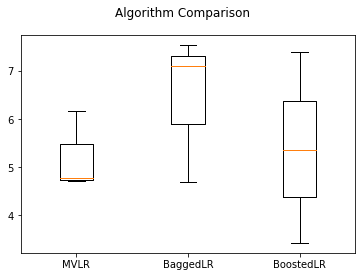

In [66]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = model_selection.cross_val_score(model, X_final, Y,cv=kfold, scoring='neg_mean_squared_error')
	results.append(np.sqrt(np.abs(cv_results)))
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()